# Transfer Learning with Tensorflow using Fine Tuning model

In [1]:
!nvidia-smi

Tue Sep 27 01:38:49 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Import helper functions


In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-09-27 01:38:49--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-09-27 01:38:50 (66.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

## Let's get some data

In [4]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2022-09-27 01:38:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.121.128, 108.177.120.128, 142.250.159.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.121.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   122MB/s    in 1.3s    

2022-09-27 01:38:57 (122 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [5]:
unzip_data("10_food_classes_10_percent.zip")

In [6]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/tes

In [7]:
# Create train dir path and test dir path
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [8]:
# Preprocessing the data
import tensorflow as tf
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 image_size=IMG_SIZE,
                                                                 batch_size=BATCH_SIZE,
                                                                 label_mode="categorical")

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size=IMG_SIZE,
                                                                batch_size=BATCH_SIZE,
                                                                label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [9]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [10]:
for images, labels in train_data.take(1):
  print(images, labels)

tf.Tensor(
[[[[4.77098236e+01 3.57098236e+01 3.77098236e+01]
   [4.67439384e+01 3.17439404e+01 3.47439384e+01]
   [5.10758934e+01 3.20758934e+01 3.60758934e+01]
   ...
   [4.72312279e+01 2.48740196e+01 1.73651142e+01]
   [4.80251961e+01 2.30251961e+01 1.80503922e+01]
   [5.00472031e+01 2.31052399e+01 1.91052399e+01]]

  [[4.93571434e+01 3.73944511e+01 3.73198357e+01]
   [4.62547836e+01 3.22547836e+01 3.22547836e+01]
   [4.78903084e+01 3.12474499e+01 3.24617386e+01]
   ...
   [4.28624992e+01 2.20340137e+01 1.68321857e+01]
   [4.51875153e+01 2.09553699e+01 1.71479969e+01]
   [4.46380119e+01 2.04058685e+01 1.83478317e+01]]

  [[5.06112900e+01 3.72366066e+01 3.51875000e+01]
   [5.03070793e+01 3.63070793e+01 3.55436859e+01]
   [4.85376282e+01 3.23855209e+01 3.26728287e+01]
   ...
   [5.66253242e+01 2.47547894e+01 1.67012177e+01]
   [5.23606529e+01 1.90169029e+01 1.37267246e+01]
   [5.90817757e+01 2.42112389e+01 1.89210606e+01]]

  ...

  [[6.97098999e+01 3.35223465e+01 1.55092640e+01]
   [7

## Building a tranfer learning model with function API
- Functional API gives more flexibility

In [11]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# Freeze the base model
base_model.trainable = False

# Create inputs into our model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = base_model(inputs)

# Average pool
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_0 = tf.keras.Model(inputs, outputs)


# Compile
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit 
history_0 = model_0.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=int(0.25 * len(test_data)),
            callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_feature_extraction")]
            )

16719872/16705208 [==============================] - 0s 0us/step
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20220927-013912
Epoch 1/5
24/24 [==============================] - 26s 275ms/step - loss: 1.8673 - accuracy: 0.4173 - val_loss: 1.3350 - val_accuracy: 0.6875
Epoch 2/5
24/24 [==============================] - 5s 196ms/step - loss: 1.1391 - accuracy: 0.7413 - val_loss: 0.9063 - val_accuracy: 0.7829
Epoch 3/5
24/24 [==============================] - 5s 173ms/step - loss: 0.8345 - accuracy: 0.8093 - val_loss: 0.7618 - val_accuracy: 0.8026
Epoch 4/5
24/24 [==============================] - 5s 208ms/step - loss: 0.6774 - accuracy: 0.8453 - val_loss: 0.6534 - val_accuracy: 0.8355
Epoch 5/5
24/24 [==============================] - 5s 171ms/step - loss: 0.5919 - accuracy: 0.8693 - val_loss: 0.6023 - val_accuracy: 0.8503


In [12]:
model_0.evaluate(test_data)

79/79 [==============================] - 7s 87ms/step - loss: 0.6107 - accuracy: 0.8376


[0.6106516718864441, 0.8375999927520752]

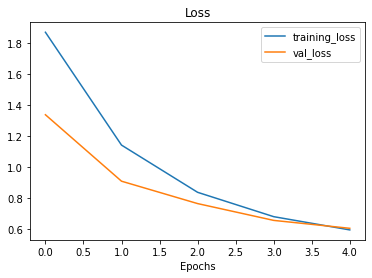

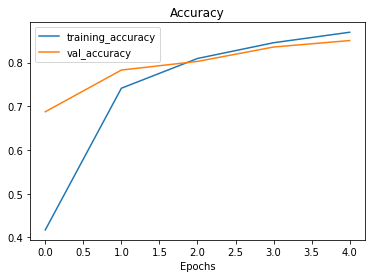

In [13]:
plot_loss_curves(history_0)

## Getting a feature vector from a trained model

In [14]:
# input shape
input_shape = (1, 4, 4, 3)

tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)

global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
global_average_pooled_tensor.shape

TensorShape([1, 3])

In [15]:
tf.reduce_mean(input_tensor, axis=[1, 2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

## Running a series of transfer learning experiments

1. model_1 - 1% of the training data
2. model_2 - 10% of the training data
3. model_3 - use fine tuning on 10% of the training data
4. model_4 - use fine tuning on all the data

In [16]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2022-09-27 01:40:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.161.128, 74.125.126.128, 74.125.201.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.161.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   214MB/s    in 0.6s    

2022-09-27 01:40:10 (214 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [17]:
unzip_data("10_food_classes_1_percent.zip")


In [18]:
train_dir_1_percent = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"

In [19]:
walk_through_dir(train_dir_1_percent)

There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.


In [20]:
IMG_SIZE = (224, 224)

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode="categorical",
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [21]:
# Adding data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
    tf.keras.layers.experimental.preprocessing.RandomWidth(0.2)
], name="data_augmentation")

## Visualize our data augmentation layer

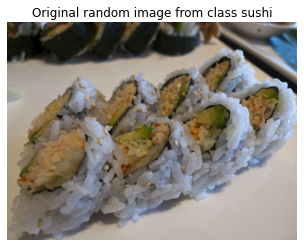

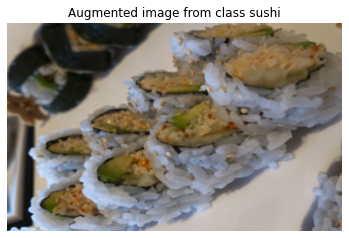

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_1_percent.class_names)

target_dir = "10_food_classes_1_percent/train/" + target_class

random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

img = mpimg.imread(random_image_path)

plt.imshow(img)
plt.title(f"Original random image from class {target_class}")
plt.axis(False);

# plot augmented image
augmented_image = data_augmentation(img, training=True)
plt.figure()
plt.imshow(augmented_image/255.);
plt.title(f"Augmented image from class {target_class}")
plt.axis(False);

## Model 1: Feature Extraction model on 1 percent of data with data augmentation

In [23]:
# Setup input shape and base model and freezing the base model layers
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create input layer
inputs = tf.keras.layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation as Sequential layer
x = data_augmentation(inputs)

x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)

outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# Make a model using inputs and outputs
model_1 = tf.keras.Model(inputs, outputs)

# Compile 
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data_1_percent,
            epochs=5,
            steps_per_epoch=len(train_data_1_percent),
            validation_data=test_data,
            validation_steps=int(0.25 * len(test_data)),
            callbacks=[create_tensorboard_callback("transfer_learning", "1_percent_data_aug")])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20220927-014017
Epoch 1/5


3/3 [==============================] - ETA: 0s - loss: 2.4239 - accuracy: 0.0714

3/3 [==============================] - 16s 4s/step - loss: 2.4239 - accuracy: 0.0714 - val_loss: 2.2030 - val_accuracy: 0.1908
Epoch 2/5
3/3 [==============================] - 6s 3s/step - loss: 2.1459 - accuracy: 0.2714 - val_loss: 2.0980 - val_accuracy: 0.2319
Epoch 3/5
3/3 [==============================] - 3s 1s/step - loss: 1.9702 - accuracy: 0.3714 - val_loss: 1.9912 - val_accuracy: 0.3076
Epoch 4/5
3/3 [==============================] - 3s 1s/step - loss: 1.8070 - accuracy: 0.5571 - val_loss: 1.8997 - val_accuracy: 0.3783
Epoch 5/5
3/3 [==============================] - 6s 3s/step - loss: 1.6976 - accuracy: 0.5429 - val_loss: 1.8011 - val_accuracy: 0.4326


In [24]:
model_1.evaluate(test_data)

79/79 [==============================] - 13s 146ms/step - loss: 1.8304 - accuracy: 0.4040


[1.8303769826889038, 0.40400001406669617]

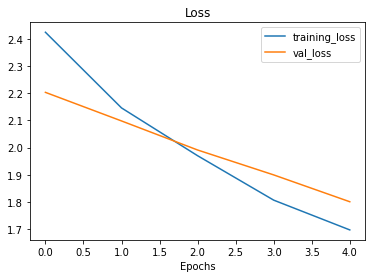

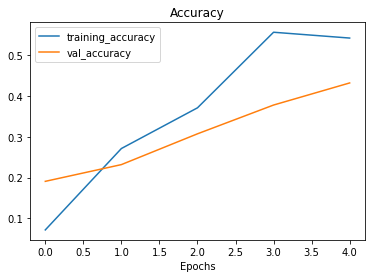

In [25]:
plot_loss_curves(history_1)

## Model 2: Feature extraction transfer model with 10% of data with data augmentation


In [26]:
# Get data
train_dir_10_percent = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [27]:
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode="categorical",
                                                                            image_size=IMG_SIZE,
                                                                            batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [28]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
    tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
], name="data_augmentation")


# input shape
input_shape = (224, 224, 3)

# Create a frozen base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# input layer
inputs = tf.keras.layers.Input(shape=input_shape, name="input_layer")

# pass through data augmentation
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)
# building model by combining inputs and outputs
model_2 = tf.keras.Model(inputs, outputs)

# compile
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

## Creating a ModelCheckpoint callback

In [29]:
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"

# create a model checkpoint callback
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only=True,
                                                         save_freq="epoch",
                                                         save_best_only=True,
                                                         verbose=1)

## Fit the model by passing model checkpoint callback

In [30]:
# Fit model 2 
initial_epochs = 5
history_2 = model_2.fit(
    train_data_10_percent,
    epochs=initial_epochs,
    steps_per_epoch=len(train_data_10_percent),
    validation_data=test_data,
    validation_steps=int(0.25*len(test_data)),
    callbacks=[create_tensorboard_callback(dir_name="transfer_learning", experiment_name="10_percent_data_aug"), checkpoint_callback]
)

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20220927-014113
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9983 - accuracy: 0.3427
Epoch 1: val_loss improved from inf to 1.44975, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 24s 522ms/step - loss: 1.9983 - accuracy: 0.3427 - val_loss: 1.4498 - val_accuracy: 0.6990
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3604 - accuracy: 0.6947
Epoch 2: val_loss improved from 1.44975 to 1.06357, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 11s 450ms/step - loss: 1.3604 - accuracy: 0.6947 - val_loss: 1.0636 - val_accuracy: 0.7632
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0554 - accuracy: 0.7453
Epoch 3: val_loss improved from 1.06357 to 0.88204, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [=

In [31]:
model_0.evaluate(test_data)

79/79 [==============================] - 10s 96ms/step - loss: 0.6107 - accuracy: 0.8376


[0.6106516718864441, 0.8375999927520752]

In [32]:
results_data_aug = model_2.evaluate(test_data)

79/79 [==============================] - 7s 84ms/step - loss: 0.6933 - accuracy: 0.8140


- Looks like data augmentation for ten percent resulted in worst result than model 0

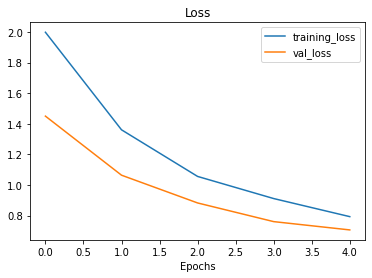

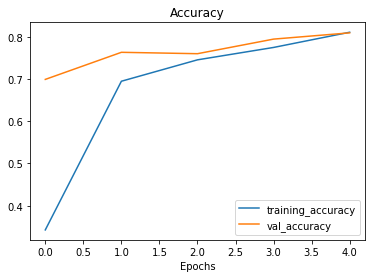

In [33]:
plot_loss_curves(history_2)

## Loading and comparing saved weights checkpoint

In [34]:
# Load weights from saved weights
model_2.load_weights(checkpoint_path)

In [35]:
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 9s 104ms/step - loss: 0.6933 - accuracy: 0.8140


In [36]:
results_data_aug == loaded_weights_model_results

False

In [37]:
# This is because of the precision at which computer store the number
# to compare we can use np.isclose()
import numpy as np
np.isclose(np.array(results_data_aug), np.array(loaded_weights_model_results))

array([ True,  True])

## Model 3: Fine tuning an existing model 0 on 10% of data 
> **Note**: Fine tuning usually works best after training a feature extraction model for a few epochs with large amounts of custom data.

In [38]:
# layers in model 2
model_2.layers

In [39]:
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f4a31ad7650> True
<keras.engine.sequential.Sequential object at 0x7f4a31ad7110> True
<keras.engine.functional.Functional object at 0x7f4a317047d0> False
<keras.layers.pooling.GlobalAveragePooling2D object at 0x7f4a31ad7610> True
<keras.layers.core.dense.Dense object at 0x7f4a30a90550> True


In [40]:
# What layers are in our base model
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [41]:
# How many trainable variables are in our base model?
print(len(model_2.layers[2].trainable_variables))

0


- There are currently no trainable layers

In [43]:
# Set last top 10 to be true, to fine tune
base_model.trainable = True
for layer in base_model.layers[:-10]:
  layer.trainable = False

In [44]:
# Recompile our entire model since we changed the base model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

**Thumb Rule** When you fine tune, its best practice is to lower learning rate by 10x but you can chose some other reduced learning rate as well

In [45]:
print(len(model_2.trainable_variables))

12


In [46]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_fine_2 = model_2.fit(train_data_10_percent,
                             epochs=fine_tune_epochs,
                             validation_data=test_data,
                             validation_steps=int(0.25 * len(test_data)),
                             initial_epoch=history_2.epoch[-1],
                             callbacks=[create_tensorboard_callback(dir_name="transfer_learning", experiment_name="fine_tune_10_percent")])

Saving TensorBoard log files to: transfer_learning/fine_tune_10_percent/20220927-015640
Epoch 5/10
24/24 [==============================] - 19s 455ms/step - loss: 0.6660 - accuracy: 0.8147 - val_loss: 0.5804 - val_accuracy: 0.8207
Epoch 6/10
24/24 [==============================] - 10s 407ms/step - loss: 0.5516 - accuracy: 0.8333 - val_loss: 0.5315 - val_accuracy: 0.8273
Epoch 7/10
24/24 [==============================] - 9s 355ms/step - loss: 0.4942 - accuracy: 0.8520 - val_loss: 0.5454 - val_accuracy: 0.8224
Epoch 8/10
24/24 [==============================] - 10s 375ms/step - loss: 0.4362 - accuracy: 0.8653 - val_loss: 0.5041 - val_accuracy: 0.8306
Epoch 9/10
24/24 [==============================] - 12s 480ms/step - loss: 0.3753 - accuracy: 0.8880 - val_loss: 0.4971 - val_accuracy: 0.8339
Epoch 10/10
24/24 [==============================] - 7s 295ms/step - loss: 0.3610 - accuracy: 0.8973 - val_loss: 0.5491 - val_accuracy: 0.8141


In [47]:
results_fine_tuned_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 6s 71ms/step - loss: 0.5012 - accuracy: 0.8248


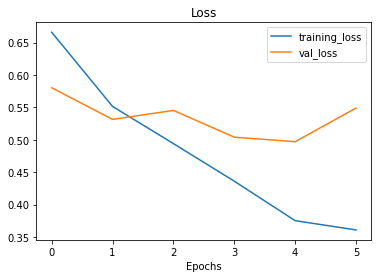

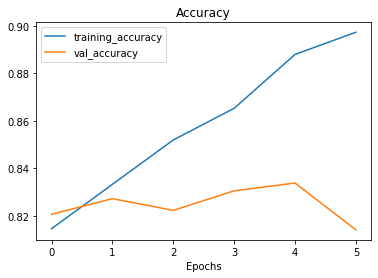

In [48]:
# Check out the loss curves of our fine tuned model
plot_loss_curves(history_fine_2)

- The plot loss curves function works great with models which have been only fit once, however we want something to compare one series of running fit() with another (e.g. before and after fine tuning)

In [50]:
# Let's create a function to compare training histories
def compare_histories(original_history, new_history, initial_epochs=5):
  accuracy = original_history.history["accuracy"]
  loss = original_history.history["loss"]
  val_accuracy = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  total_accuracy = accuracy + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]
  total_val_accuracy = val_accuracy + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  # Make plots for accuracy
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(total_accuracy, label="Training accuracy")
  plt.plot(total_val_accuracy, label="Validation accuracy")
  plt.plot([initial_epochs-1, initial_epochs - 1], plt.ylim(), label="Start Fine Tuning")
  plt.legend(loc="lower right")
  plt.title("Training and Validation Accuracy");

  # Make plot for loss
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 2)
  plt.plot(total_loss, label="Training loss")
  plt.plot(total_val_loss, label="Validation Loss")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
  plt.legend(loc="upper right")
  plt.title("Training and Validation Loss")


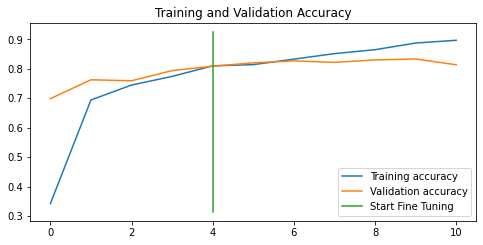

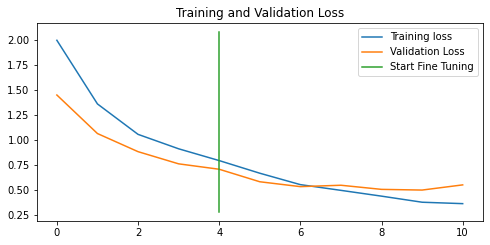

In [51]:
compare_histories(history_2, history_fine_2)

## Model 4: Fine tuning an existing model with all of data

In [52]:
# Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

unzip_data("10_food_classes_all_data.zip")

--2022-09-27 02:22:25--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.159.128, 142.251.120.128, 142.251.161.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.159.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   254MB/s    in 1.9s    

2022-09-27 02:22:27 (254 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [53]:
# Setup train and test data dir
train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [54]:
# Walk through the directory
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 

In [56]:
# Preprocess data
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode="categorical",
                                                                 image_size=IMG_SIZE,
                                                                 batch_size=BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                batch_size=BATCH_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


> To train a fine tune model (model_4) we need to revert model_2 back to its feature extraction weights

In [60]:
# Load weights from checkpoint, that way we can fine tune model from the same stage the 10 percent model was fine tuned from
model_2.load_weights(checkpoint_path)

In [61]:
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 global_average_pooling_layer True
4 output_layer True


In [63]:
# Let's trainable layers in base model
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [64]:
# Recompile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

In [65]:
# Continue to train and fine tune the model to our data (100% of training data)
fine_tune_epochs = initial_epochs + 5
history_4 = model_2.fit(train_data,
                        epochs=fine_tune_epochs,
                        validation_data=test_data,
                        validation_steps=int(0.25*len(test_data)),
                        initial_epoch=history_2.epoch[-1],
                        callbacks=[create_tensorboard_callback(
                            dir_name="transfer_learning",
                            experiment_name="fine_tune_all_data"
                        )])

Saving TensorBoard log files to: transfer_learning/fine_tune_all_data/20220927-024000
Epoch 5/10
235/235 [==============================] - 59s 220ms/step - loss: 0.7234 - accuracy: 0.7683 - val_loss: 0.3940 - val_accuracy: 0.8668
Epoch 6/10
235/235 [==============================] - 47s 199ms/step - loss: 0.5757 - accuracy: 0.8127 - val_loss: 0.3600 - val_accuracy: 0.8717
Epoch 7/10
235/235 [==============================] - 49s 206ms/step - loss: 0.5209 - accuracy: 0.8335 - val_loss: 0.3183 - val_accuracy: 0.8849
Epoch 8/10
235/235 [==============================] - 40s 167ms/step - loss: 0.4737 - accuracy: 0.8488 - val_loss: 0.3183 - val_accuracy: 0.8980
Epoch 9/10
235/235 [==============================] - 39s 163ms/step - loss: 0.4350 - accuracy: 0.8575 - val_loss: 0.2929 - val_accuracy: 0.9013
Epoch 10/10
235/235 [==============================] - 41s 174ms/step - loss: 0.4052 - accuracy: 0.8709 - val_loss: 0.2932 - val_accuracy: 0.9095


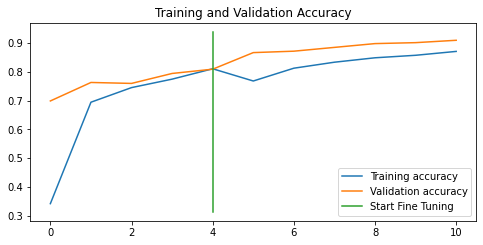

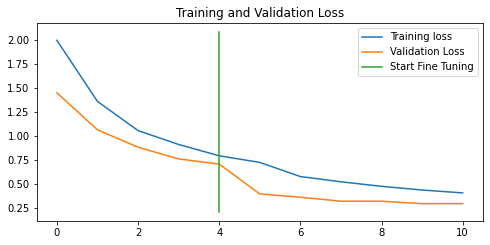

In [66]:
# Comparing histories
compare_histories(history_2, history_4)

## Viewing our experiment data on tensorboard

In [68]:
!tensorboard dev upload --logdir ./transfer_learning \
  --name "Transfer Learning Experiments with Food 101" \
  --description "A series of different transfer learning experiments with varying amounts of data and fine tuning" \
  --one_shot # exits the uploader once finish uploading


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./transfer_learning

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=SQ387nRuYuyqoGNiEprGtf706Fa1j9&prompt=consent&access_type=o

In [69]:
# list experiments
!tensorboard dev list

https://tensorboard.dev/experiment/5BSKbpqEQE6RdkTMCXbkgw/
	Name                 Transfer Learning Experiments with Food 101
	Description          A series of different transfer learning experiments with varying amounts of data and fine tuning
	Id                   5BSKbpqEQE6RdkTMCXbkgw
	Created              2022-09-27 02:49:03 (3 minutes ago)
	Updated              2022-09-27 02:49:08 (3 minutes ago)
	Runs                 10
	Tags                 5
	Scalars              162
	Tensor bytes         0
	Binary object bytes  4308646
https://tensorboard.dev/experiment/6XcOQBdgRhK5vxND9yaw2A/
	Name                 Compare EfficientNetB0 vs ResNet50V2
	Description          Comparing of the loss and accuracy of training data and validation data
	Id                   6XcOQBdgRhK5vxND9yaw2A
	Created              2022-09-25 14:15:03
	Updated              2022-09-25 14:15:05
	Runs                 4
	Tags                 5
	Scalars              60
	Tensor bytes         0
	Binary object bytes  591594

In [ ]:
# delete tensorboard experiment
# !tensorboard dev delete --experiment_id 5BSKbpqEQE6RdkTMCXbkgw